In [1]:
import os
import pandas as pd
import plotly.express as px
import progressbar
import json

## Get the paths and build table names for iteration

In [2]:
data_path = '../src/data'
mapping_corpus_path = data_path + r'/product/lspc2020_to_tablecorpus'
mapping_corpus_path_2 = data_path + r'/product/lspc2020_to_tablecorpus/Cleaned'
table_corpus_path = data_path + r'/product/product_top100/cleaned'
table_corpus_path_with_id = data_path + r'/product/product_top100/cleaned/with_id'
table_corpus_path2 = data_path + r'/product/product_minimum3/cleaned/with_id'

In [3]:
zip_files_mapping = [file for file in os.listdir(mapping_corpus_path_2) if file.endswith('.json.gz')]
zip_files_tables = [file for file in os.listdir(table_corpus_path) if file.endswith('.json.gz')]

FileNotFoundError: [WinError 3] Das System kann den angegebenen Pfad nicht finden: '../src/data/product/product_top100/cleaned'

In [ ]:
# count = 0
# count_1=0
# with progressbar.ProgressBar(max_value=len(zip_files_tables)) as bar:
#     for zip_file in zip_files_tables:
#         print('/{}'.format(zip_file))
#         df = pd.read_json(table_corpus_path + '/{}'.format(zip_file), compression='gzip', lines=True)     
#         df['cluster_id']=0
#         for zip_file_map in zip_files_mapping:
#             count_1=count_1+1
#             print(count_1)
#             df_map = pd.read_json(mapping_corpus_path_2 + '/{}'.format(zip_file_map), compression='gzip', lines=True)
#             for i in range(len(df_map)):
#                 if df_map['table_id'][i]=='{}'.format(zip_file):
#                   index_map=df_map['row_id'][i]
#                   if df.index[df['row_id'] == index_map].size != 0:
#                     index_table=df.index[df['row_id'] == index_map][0]
#                     if df['cluster_id'][index_table]==0:
#                         df['cluster_id'][index_table]=df_map['cluster_id'][i] 
#                     else:
#                         print('double product value in table')
#         df.to_json(table_corpus_path_with_id + '/{}'.format(zip_file), compression='gzip', orient='records', lines=True)
#         df
#         count += 1
#         bar.update(count)

In [ ]:
# count = 0
# count_1=0
# with progressbar.ProgressBar(max_value=len(zip_files_tables)) as bar:
#     for zip_file in zip_files_tables:
#         print('/{}'.format(zip_file))
#         df = pd.read_json(table_corpus_path2 + '/{}'.format(zip_file), compression='gzip', lines=True)     
#         df['cluster_id']=0
#         for zip_file_map in zip_files_mapping:
#             count_1=count_1+1
#             print(count_1)
#             df_map = pd.read_json(mapping_corpus_path_2 + '/{}'.format(zip_file_map), compression='gzip', lines=True)
#             for i in range(len(df_map)):
#                 if df_map['table_id'][i]=='{}'.format(zip_file):
#                   index_map=df_map['row_id'][i]
#                   if df.index[df['row_id'] == index_map].size != 0:
#                     index_table=df.index[df['row_id'] == index_map][0]
#                     if df['cluster_id'][index_table]==0:
#                         df['cluster_id'][index_table]=df_map['cluster_id'][i] 
#                     else:
#                         print('double product value in table')
#         df.to_json(table_corpus_path2_with_id + '/{}'.format(zip_file), compression='gzip', orient='records', lines=True)
#         df
#         count += 1
#         bar.update(count)

## Only use first cleaning step on cluster_id tables

#### Matching the cluster_ids to the entity tables Top100 did not result in good clusters, as the Top100 seem to be pretty specific regarding their input, e.g., amazonaws with aws-ids as products -> no matches somewhere else

In [ ]:
# # Use the 4 endings to search for english websites and then only keep these to get valid cluster_ids
# def clean_table(df):
#   valid_tld = ['.com', '.net', '.org', '.uk']
#   df['Valid']=0
#   for i in range(len(df)):
#     #print(i)
#     for tld in valid_tld:
#       if tld in df['table_id'][i]:
#         df['Valid'][i]=1
#   return df[df['Valid']==1]

In [ ]:
# #clean mapping files and save them again
# # then use the cleaned tables to append into a series and the get a dataframe from that
# count = 0
# count_1=0
# data=[]
# with progressbar.ProgressBar(max_value=len(zip_files_mapping)) as bar:
#     for zip_file in zip_files_mapping:
#         print('/{}'.format(zip_file))
#         df = pd.read_json(mapping_corpus_path_2 + '/{}'.format(zip_file), compression='gzip', lines=True)
#         #df=clean_table(df)
#         #df['table_name']='{}'.format(zip_file)
#         #df.to_json(mapping_corpus_path_2 + '/{}'.format(zip_file), compression='gzip', orient='records', lines=True)
#         data.append(df)
#         count += 1
#         bar.update(count)
# #large_df= pd.concat(data, ignore_index=True)
# #large_df.to_json(os.path.join(mapping_corpus_path, 'concatentation'), compression='gzip', orient='records', lines=True)

In [ ]:
# #see the input of the series
# data

### Concat the series into a dataframe and then sort by the cluster_ids to get the table counts for each cluster

In [ ]:
# large_df= pd.concat(data, ignore_index=True)

In [ ]:
#table has around 28 Million valid cluster ids (not necessarily unique)
# large_df

## Filter on cluster_id and table_id to be easily able to count the table_ids per unique cluster

In [4]:
# get dictionaries
data_path_1 = '../src/data/product/lspc2020_to_tablecorpus/Cleaned/allocation_amount_only_total_dict.json'
data_path_2 = '../src/data/product/lspc2020_to_tablecorpus/Cleaned/allocation_amount_only_set_dict.json'

In [5]:
with open(data_path_1) as f:
    data_1=json.load(f)

In [6]:
with open(data_path_2) as f:
    data_2=json.load(f)

In [7]:
df_total=pd.DataFrame.from_dict(data_1, orient='index')
df_total

,0
73924608,1
31326208,1
22544400,1
51904529,1
74055698,1
...,...
14680043,1
6553589,1
20709366,1
75628536,1


In [8]:
df_set=pd.DataFrame.from_dict(data_2, orient='index')
df_set

,0
73924608,1
31326208,1
22544400,1
51904529,1
74055698,1
...,...
14680043,1
6553589,1
20709366,1
75628536,1


In [9]:
df_total=df_total.reset_index().rename(columns={0:"Amount",'index':"cluster_id"})
df_set=df_set.reset_index().rename(columns={0:"Amount",'index':"cluster_id"})

In [10]:
df_set.max()

index     9999996
Amount       1285
dtype: object

In [11]:
df_total.max()

index     9999996
Amount       2600
dtype: object

In [12]:
# We discard all clusters with less than 2 entries, cause we cannot match anything there, so 1,6 million clusters remain
df_set=df_set[df_set['Amount']>1]
df_set

,index,Amount
5,131092,29
9,4980762,4
25,17694777,2
27,2490427,9
28,4980796,2
...,...,...
20852522,55847403,2
20887842,2436046,2
20892455,740855,2
20900059,2721215,2


In [13]:
df_set.set_index('cluster_id').describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Amount,1244562.0,4.0,11.0,2.0,2.0,2.0,3.0,1285.0


<AxesSubplot:ylabel='Frequency'>

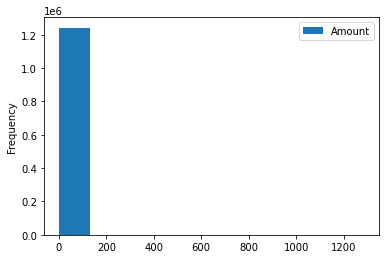

In [16]:
df_set.plot(x='cluster_id',y='Amount',kind='hist')

In [17]:
# filter on clusters with more entries to get information, here are still 20k clusters left
df_15=df_set[df_set['Amount']>15]
df_15

,cluster_id,Amount
5,131092,29
30,47710279,42
201,2621903,33
642,787983,18
646,1050139,16
...,...,...
8306446,65770080,17
8780123,19170901,17
9040570,58582000,16
9429552,19412215,17


In [19]:
df_15.set_index('cluster_id').describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Amount,19367.0,59.0,69.0,16.0,22.0,33.0,63.0,1285.0


<AxesSubplot:ylabel='Frequency'>

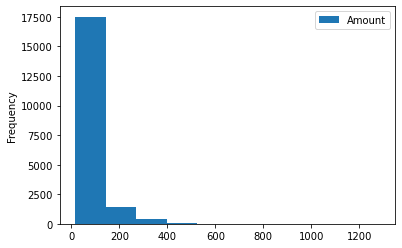

In [20]:
df_15.plot(x='cluster_id',y='Amount',kind='hist')

In [21]:
# filter on clusters with more entries to get information, here are still 20k clusters left
df_150=df_set[df_set['Amount']>150]
df_150

,cluster_id,Amount
696,63047326,158
729,26085086,162
1001,59902335,185
1406,47320529,156
1584,24252278,176
...,...,...
1082271,5388699,172
1093363,63881368,174
1192604,40071639,154
1198138,72856662,202


In [22]:
df_150.set_index('cluster_id').describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Amount,1608.0,242.0,99.0,151.0,171.0,205.0,280.0,1285.0


<AxesSubplot:ylabel='Frequency'>

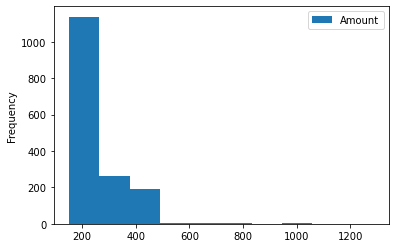

In [23]:
df_150.plot(x='cluster_id',y='Amount',kind='hist')

In [25]:
df_15_500=df_15[df_15['Amount']<500]

<AxesSubplot:ylabel='Frequency'>

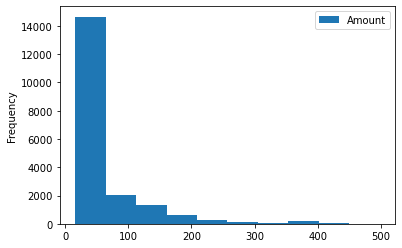

In [27]:
df_15_500.plot(x='cluster_id',y='Amount',kind='hist')